In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Checking for duplicate rows

In [3]:
#train_df[train_df.duplicated(keep=False)]
#test_df[test_df.duplicated(keep=False)]

# Check for number of rows & columns

In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


# Survived ratio

In [5]:
train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

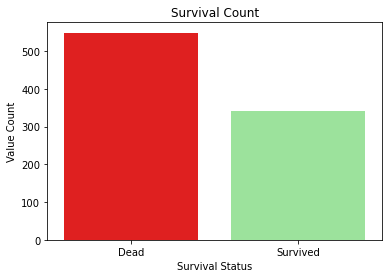

In [6]:
sns.countplot(data=train_df, x = train_df['Survived'],palette=['red','lightgreen'])
plt.xlabel("Survival Status")
plt.ylabel("Value Count")
plt.title("Survival Count")
plt.xticks(ticks=[0,1],labels=["Dead","Survived"])
plt.show()

# Pivot table

In [7]:
pclass_pivot = train_df.pivot_table(index='Pclass',columns='Survived',values='PassengerId',aggfunc='count')
pclass_pivot.columns = ['Dead','Survived']
pclass_pivot['Total'] = pclass_pivot['Dead'] + pclass_pivot['Survived']
pclass_pivot['Survived%'] = round((pclass_pivot['Survived']/pclass_pivot['Total'])*100,1).astype('string')+'%'

In [8]:
pclass_pivot

,Dead,Survived,Total,Survived%
Pclass,,,,
1,80,136,216,63.0%
2,97,87,184,47.3%
3,372,119,491,24.2%


# Graph by Pclass

In [9]:
survival_percentage = pclass_pivot['Survived%']

In [10]:
dead = pclass_pivot['Dead']
survived = pclass_pivot['Survived']

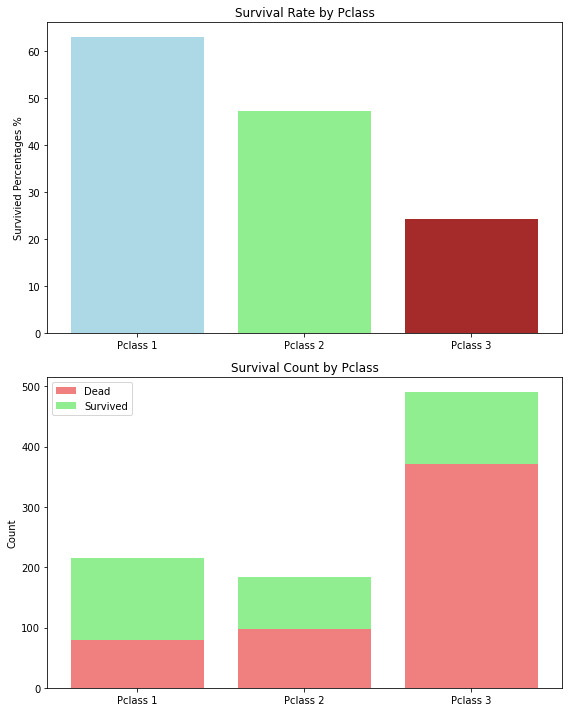

In [11]:
x = pclass_pivot.index
y = [float(percentage.strip('%')) for percentage in survival_percentage]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8, 10))

ax1.bar(x,y,color = ['lightblue','lightgreen','brown'],tick_label=['Pclass 1','Pclass 2','Pclass 3'])
ax1.set_ylabel('Survivied Percentages %')
ax1.set_title('Survival Rate by Pclass')


ax2.bar(x,dead,color = 'lightcoral',label = 'Dead',tick_label=['Pclass 1','Pclass 2','Pclass 3'])
ax2.bar(x,survived,bottom = dead,color = 'lightgreen',label = 'Survived')
ax2.set_ylabel('Count')
ax2.set_title('Survival Count by Pclass')
ax2.legend()

plt.tight_layout()
plt.show()

# Duplicate row by Name

In [12]:
#train_df[train_df.duplicated(subset='Name')]

In [13]:
gender_pivot = train_df.pivot_table(index = 'Sex',values = 'PassengerId', columns = 'Survived', aggfunc = 'count' )
gender_pivot.columns = ['Dead','Survived']
gender_pivot['Total'] = gender_pivot['Dead'] + gender_pivot['Survived']
gender_pivot['Survival %'] = round((gender_pivot['Survived']/gender_pivot['Total'])*100,1).astype('string')+'%'
gender_pivot

,Dead,Survived,Total,Survival %
Sex,,,,
female,81,233,314,74.2%
male,468,109,577,18.9%


# Graph by Gender

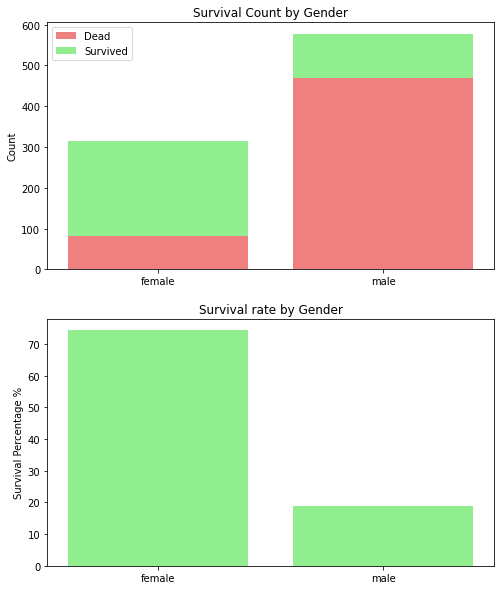

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (8,10))

x = gender_pivot.index
y_survived = gender_pivot['Survived']
y_dead = gender_pivot['Dead']
ax1.bar(x,y_dead,label='Dead',color = 'lightcoral' )
ax1.bar(x,y_survived, label='Survived',bottom = y_dead, color = 'lightgreen')
ax1.set_title('Survival Count by Gender')
ax1.set_ylabel('Count')
ax1.legend()



y_survived_percentage = [float(percentage.strip('%')) for percentage in gender_pivot['Survival %']]
ax2.bar(x,y_survived_percentage,color = 'lightgreen')
ax2.set_ylabel('Survival Percentage %')
ax2.set_title('Survival rate by Gender')
plt.show()

# Graph by Age

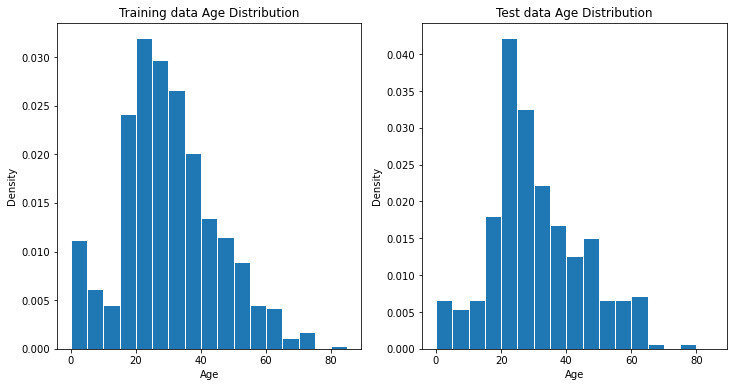

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))

ax1.hist(train_df['Age'], bins=range(0, 90, 5),edgecolor = 'white',density=True)
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_title('Training data Age Distribution')


ax2.hist(test_df['Age'], bins=range(0, 90, 5),edgecolor = 'white',density=True)
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')
ax2.set_title('Test data Age Distribution')
plt.show()

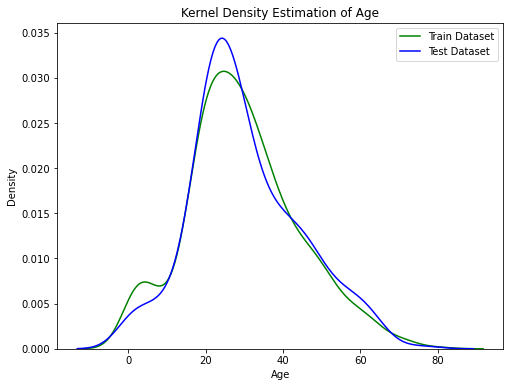

In [16]:
fig, ax = plt.subplots(figsize = (8,6))
sns.kdeplot(data=train_df,x='Age',color='green',label='Train Dataset')
sns.kdeplot(data=test_df,x='Age',color='blue',label='Test Dataset')
plt.title('Kernel Density Estimation of Age')
plt.legend()
plt.show()

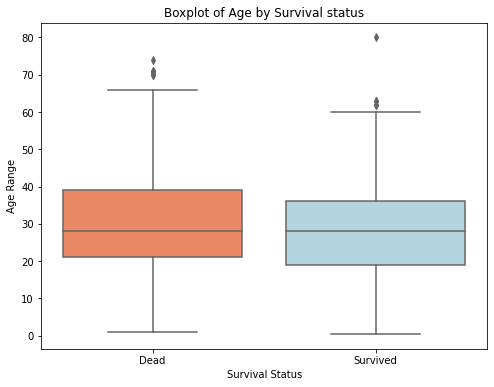

In [17]:
fig, ax = plt.subplots(figsize = (8,6))

sns.boxplot(data = train_df, x = 'Survived',y='Age',palette=['coral','lightblue'])

ax.set_title('Boxplot of Age by Survival status')
ax.set_xticklabels(['Dead','Survived'])
ax.set_xlabel('Survival Status')
ax.set_ylabel('Age Range')

plt.show()


# Graph by SibSp

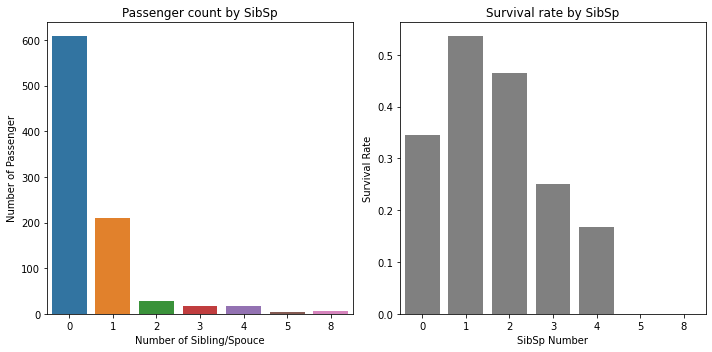

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.countplot(data = train_df,x = 'SibSp',ax = ax1)
ax1.set_title('Passenger count by SibSp')
ax1.set_xlabel('Number of Sibling/Spouce')
ax1.set_ylabel('Number of Passenger')

sib_survival_rate = train_df.groupby('SibSp')['Survived'].mean().reset_index()
sns.barplot(x = 'SibSp',y = 'Survived', data = sib_survival_rate, ax = ax2, color = 'grey')
ax2.set_title('Survival rate by SibSp')
ax2.set_xlabel('SibSp Number')
ax2.set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

In [19]:
Sib_pivot = train_df.pivot_table(index = 'SibSp',columns = 'Survived',values = 'PassengerId',aggfunc='count',fill_value=0)
Sib_pivot.columns = ['Dead','Survived']
Sib_pivot['total'] = Sib_pivot['Dead'] + Sib_pivot['Survived'] 
Sib_pivot['Survival %'] = round(Sib_pivot['Survived'] /Sib_pivot['total']*100).astype(str) + '%'
Sib_pivot

,Dead,Survived,total,Survival %
SibSp,,,,
0,398,210,608,35.0%
1,97,112,209,54.0%
2,15,13,28,46.0%
3,12,4,16,25.0%
4,15,3,18,17.0%
5,5,0,5,0.0%
8,7,0,7,0.0%


# Graph of Parent Child (Parch)

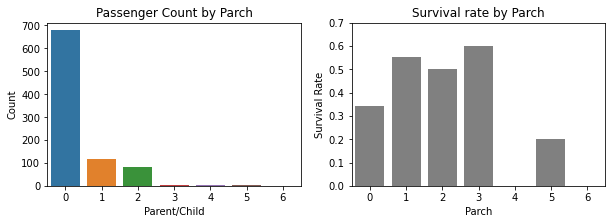

In [20]:
fig = plt.figure(figsize = (10,3))
ax1 = plt.subplot(1,2,1)
sns.countplot(data = train_df, x = 'Parch', ax = ax1)
ax1.set_title('Passenger Count by Parch')
ax1.set_xlabel('Parent/Child')
ax1.set_ylabel('Count')

ax2 = plt.subplot(1,2,2)
parch_survival = train_df.groupby('Parch')['Survived'].mean().reset_index()
sns.barplot(data = parch_survival, x = 'Parch',ax = ax2,y = 'Survived', color = 'grey')
ax2.set_title('Survival rate by Parch')
ax2.set_xlabel('Parch')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0,0.7])
plt.show()

In [21]:
parch_pivot = train_df.pivot_table(values = 'PassengerId',index = 'Parch',columns = 'Survived',fill_value=0,aggfunc = 'count')
parch_pivot.columns = ['Dead', 'Survived']
parch_pivot['Total'] = parch_pivot['Dead'] + parch_pivot['Survived']
parch_pivot['Survived %'] = round(parch_pivot['Survived']/parch_pivot['Total']*100,1).astype(str) + '%'
parch_pivot

,Dead,Survived,Total,Survived %
Parch,,,,
0,445,233,678,34.4%
1,53,65,118,55.1%
2,40,40,80,50.0%
3,2,3,5,60.0%
4,4,0,4,0.0%
5,4,1,5,20.0%
6,1,0,1,0.0%


# Ticket Count

In [22]:
train_df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# Graph of Ticket Fare

In [23]:
len(pd.unique(train_df['Fare']))

248

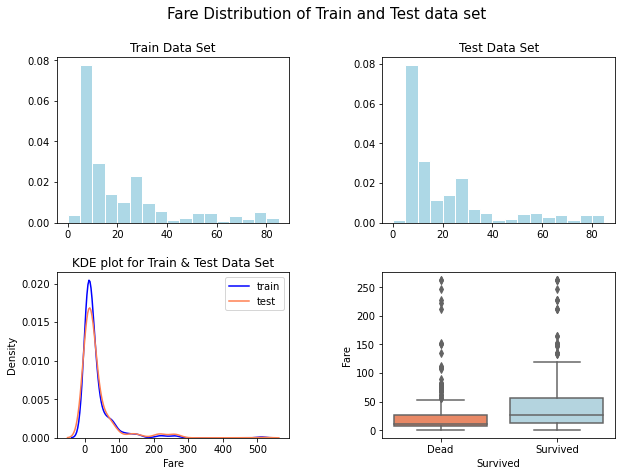

In [24]:
fig = plt.figure(figsize = (10,7))
ax1 = plt.subplot(2,2,1)
count, bin_edges = np.histogram(train_df['Fare'],bins = range(0,90,5))
ax1.hist(train_df['Fare'], bins = bin_edges,edgecolor = 'white',density = True,color = 'lightblue')
ax1.set_title('Train Data Set')

ax2 = plt.subplot(2,2,2)
count, bin_edges = np.histogram(test_df['Fare'], bins = range(0,90,5))
ax2.hist(test_df['Fare'], bins = bin_edges, edgecolor = 'white', density = 'True',color = 'lightblue')
ax2.set_title('Test Data Set')


ax3 = plt.subplot(2,2,3)
sns.kdeplot(data = train_df,x = 'Fare', color = 'blue',label = 'train',ax = ax3)
sns.kdeplot(data = test_df,x = 'Fare', color = 'coral',label = 'test',ax = ax3)
ax3.legend()
ax3.set_title('KDE plot for Train & Test Data Set')

ax4 = plt.subplot(2,2,4)
sns.boxplot(data = train_df[train_df['Fare']< 500], x = 'Survived', y = 'Fare', palette=['coral','lightblue'])
ax4.set_xticklabels(['Dead','Survived'])

plt.subplots_adjust(hspace = 0.3,wspace=0.4)
plt.suptitle('Fare Distribution of Train and Test data set',fontsize = 15)
plt.show()

In [25]:
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

# Graph of Embark

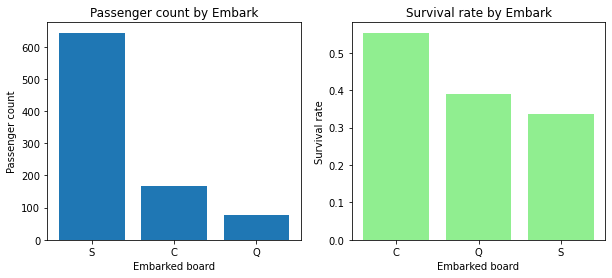

In [26]:
embarked_list = train_df['Embarked'].value_counts()
#embarked_list.index
embarked_survival_rate = train_df.groupby('Embarked')['Survived'].mean()

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))


ax1.bar(embarked_list.index,embarked_list.values)
ax1.set_title('Passenger count by Embark')
ax1.set_xlabel('Embarked board')
ax1.set_ylabel('Passenger count')


ax2.bar(embarked_survival_rate.index,embarked_survival_rate.values, color = 'lightgreen')
ax2.set_title('Survival rate by Embark')
ax2.set_xlabel('Embarked board')
ax2.set_ylabel('Survival rate')

plt.show()

In [27]:
embarked_pivot = train_df.pivot_table(index = 'Embarked',values = 'PassengerId',columns = 'Survived',aggfunc='count',fill_value=0)
embarked_pivot.columns = ['Dead','Survived']
embarked_pivot['Total'] = embarked_pivot['Dead'] + embarked_pivot['Survived']
embarked_pivot['Survival %'] = round(embarked_pivot['Survived']/embarked_pivot['Total'] *100,1).astype(str)+'%'
embarked_pivot

,Dead,Survived,Total,Survival %
Embarked,,,,
C,75,93,168,55.4%
Q,47,30,77,39.0%
S,427,217,644,33.7%


# Embarked vs Fare

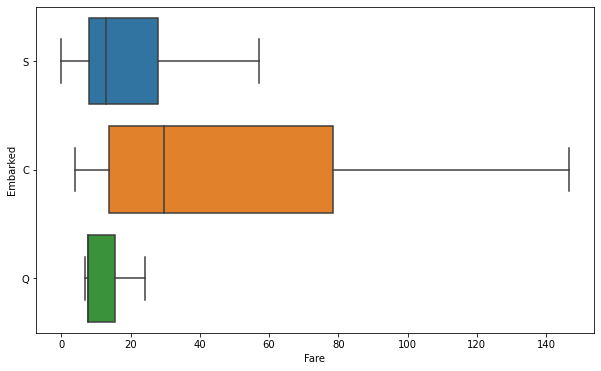

In [28]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = train_df, x = 'Fare',y = 'Embarked', showfliers=False)

plt.show()

# Pclass vs Embarked

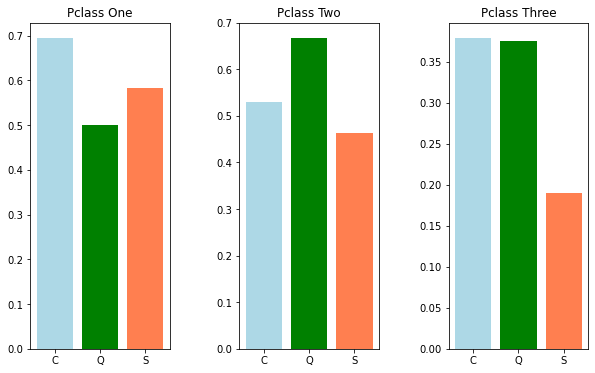

In [29]:
#Pclass 1
x = train_df['Embarked'].unique()
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (10,6))


train_df.pivot_table(index = train_df['Embarked'],values = 'PassengerId',columns='Pclass',aggfunc='count')

Pclass_1 = train_df[train_df['Pclass']==1]
Pclass_1_mean = Pclass_1.groupby('Embarked')['Survived'].mean()
ax1.bar(Pclass_1_mean.index, Pclass_1_mean.values, color=['lightblue','green','coral'])
#sns.countplot(data = Pclass_1, x = Pclass_1['Embarked'], ax = ax1, order = ['C','S','Q'])


Pclass_2 = train_df[train_df['Pclass']==2]
Pclass_2_mean = Pclass_2.groupby('Embarked')['Survived'].mean()
ax2.bar(Pclass_2_mean.index, Pclass_2_mean.values, color=['lightblue','green','coral'])
#sns.countplot(data = Pclass_2, x = Pclass_2['Embarked'], ax = ax2, order = ['C','S','Q'])


Pclass_3 = train_df[train_df['Pclass']==3]
Pclass_3_mean = Pclass_3.groupby('Embarked')['Survived'].mean()
ax3.bar(Pclass_3_mean.index, Pclass_3_mean.values, color=['lightblue','green','coral'])
#sns.countplot(data = Pclass_3, x = Pclass_3['Embarked'], ax = ax3, order = ['C','S','Q'])


ax1.set_title('Pclass One')
ax2.set_title('Pclass Two')
ax3.set_title('Pclass Three')

plt.subplots_adjust(wspace=0.5)
plt.show()

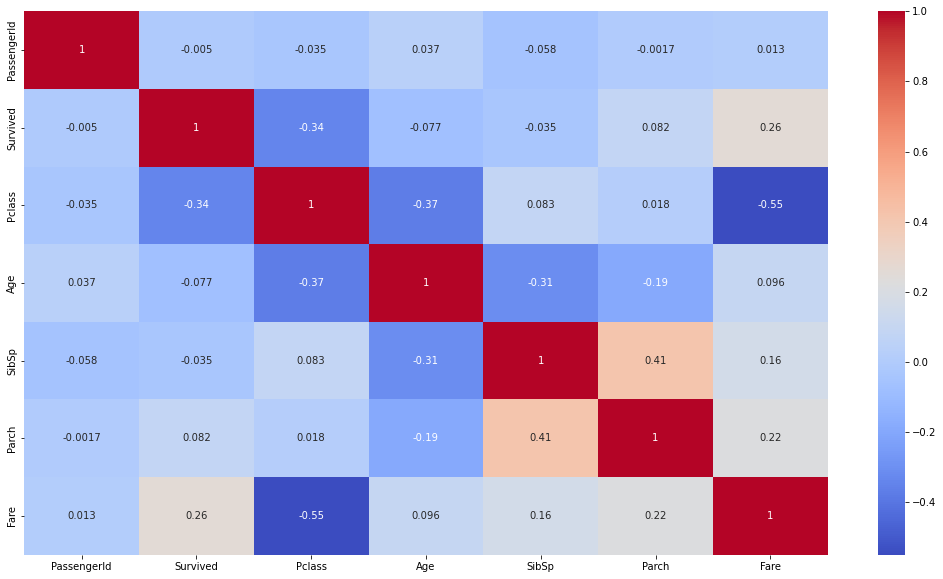

In [30]:
plt.figure(figsize=(18,10))
sns.heatmap(train_df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [31]:
#train_df[train_df['Pclass']==1][pd.isnull(train_df['Age'])]

#train_df
pclass_age_mean = train_df.groupby('Pclass')['Age'].mean()
#pclass_age_mean
#pclass_age_mean.loc[1]

In [32]:
mask_3 = train_df['Pclass'] == 3
train_df.loc[mask_3,'Age'] = train_df.loc[mask_3,'Age'].fillna(pclass_age_mean.loc[3])

In [33]:
mask_1 = train_df['Pclass'] == 1
train_df.loc[mask_1,'Age'] = train_df.loc[mask_1,'Age'].fillna(pclass_age_mean.loc[1])

In [34]:
mask_2 = train_df['Pclass'] == 2
train_df.loc[mask_2,'Age'] = train_df.loc[mask_2,'Age'].fillna(pclass_age_mean.loc[2])

In [35]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

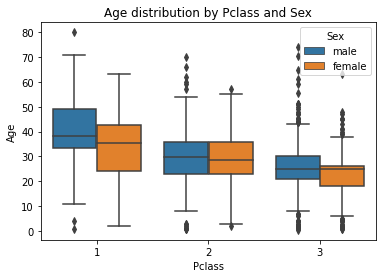

In [36]:
sns.boxplot(data = train_df, x = 'Pclass', y = 'Age', hue = 'Sex')
plt.title('Age distribution by Pclass and Sex')
plt.show()

In [37]:
#train['Age'] = train.apply(lambda x: age_median.loc[(x['Pclass'], x['Sex'])] if np.isnan(x['Age']) else x['Age'], axis=1)


In [38]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [39]:
most_frequent_embarked = train_df['Embarked'].value_counts().idxmax()
train_df['Embarked'].replace(np.nan,most_frequent_embarked,inplace=True)

In [40]:
train_df['Cabin_Letter'] = train_df.Cabin.str[:1]
train_df.Cabin_Letter.fillna('Unknown',inplace=True)
train_df = train_df.drop(columns='Cabin')

In [41]:
train_df.Cabin_Letter.value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Cabin_Letter, dtype: int64

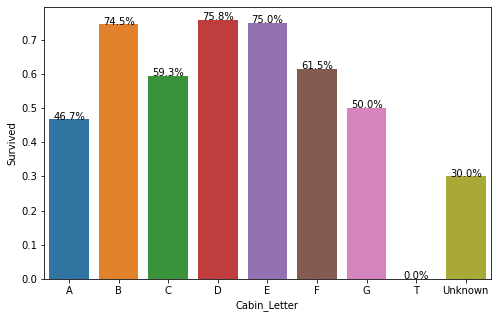

In [42]:
fig = plt.figure(figsize = (8,5))
cabin_mean = train_df.groupby('Cabin_Letter')['Survived'].mean().reset_index()
ax = sns.barplot(x = 'Cabin_Letter',y='Survived',data=cabin_mean)

for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',(p.get_x()+p.get_width() / 2.,p.get_height()),ha = 'center')
plt.show()

In [43]:
train_df['is_female'] = train_df.Sex.apply(lambda x: 1 if x == 'female' else 0)

In [44]:
train_df['Family_Size'] = train_df['Parch'] + train_df['SibSp'] + 1

In [45]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Letter,is_female,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Unknown,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Unknown,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,C,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,Unknown,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,B,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,Unknown,1,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,C,0,1


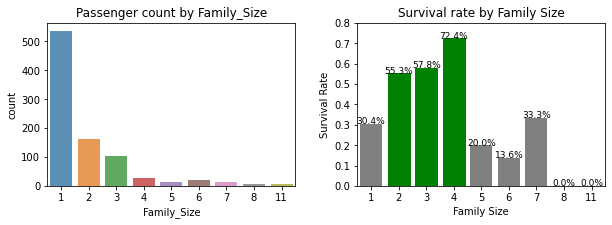

In [46]:
fig = plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
sns.countplot(data = train_df,x = 'Family_Size',alpha = 0.8, ax = ax1)
ax1.set_title('Passenger count by Family_Size')

ax2 = plt.subplot(1,2,2)
family_size_mean = train_df.groupby('Family_Size')['Survived'].mean().reset_index().sort_values(by = 'Survived',ascending = False)
sns.barplot(data = family_size_mean, x = 'Family_Size',y = 'Survived',ax = ax2, color='grey')
for i in range(1,4):
    plt.gca().get_children()[i].set_color('g')
ax2.set_title('Survival rate by Family Size')
ax2.set_xlabel('Family Size')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0,0.8])

for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%',(p.get_x()+p.get_width() / 2.,p.get_height()),ha = 'center',fontsize = 9)

plt.subplots_adjust(wspace = 0.25)
plt.show()

In [47]:
family_size_mean

,Family_Size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [48]:
tickets = train_df.groupby('Ticket')[['PassengerId']].count().rename(columns = {'PassengerId':'Count'})
tickets.head()

,Count
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1


In [49]:
train_df['Group_Size'] = train_df['Ticket'].apply(lambda x: tickets.loc[x,'Count'])

In [50]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Letter,is_female,Family_Size,Group_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Unknown,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,C,1,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Unknown,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,C,1,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Unknown,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,Unknown,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,B,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,Unknown,1,4,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,C,0,1,1


In [51]:
train_df['Title'] = train_df['Name'].str.split(', ').str[1].str.split('.').str[0]

In [52]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [53]:
title_mapping= {'Mr':'Mr', 'Mrs':'Mrs', 'Miss':'Miss','Master':'Master', 'Don':'Rare', 'Rev':'Rare', 'Dr':'Rare', 'Mme':'Mrs', 'Ms':'Miss',
       'Major':'Rare', 'Lady':'Rare' , 'Sir':'Rare', 'Mlle':'Miss', 'Col':'Rare', 'Capt':'Rare', 'the Countess':'Rare',
       'Jonkheer':'Rare', 'Dona':'Rare'}

In [54]:
train_df['Title'] = train_df['Title'].map(title_mapping)

In [55]:
Q1, Q2, Q3 = np.percentile(train_df['Fare'], [25, 50, 75])
IQR = Q3 - Q1

fare_bin_edges = [-np.inf, Q1, Q2, Q3, 1.5 * IQR, np.inf]

fare_bin_labels = []
for i in range(len(fare_bin_edges)-1):
    fare_bin_labels.append("{}_to_{}".format(fare_bin_edges[i], fare_bin_edges[i+1]))

train_df['Fare_bin'] = pd.cut(train_df['Fare'], bins=fare_bin_edges, labels=fare_bin_labels)

In [56]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Letter,is_female,Family_Size,Group_Size,Title,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Unknown,0,2,1,Mr,-inf_to_7.9104
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,2,1,Mrs,34.6344_to_inf
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unknown,1,1,1,Miss,7.9104_to_14.4542
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,1,2,2,Mrs,34.6344_to_inf
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Unknown,0,1,1,Mr,7.9104_to_14.4542


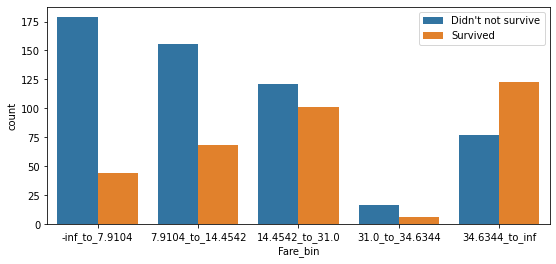

In [57]:
plt.figure(figsize = (9,4))
sns.countplot(data = train_df, x = 'Fare_bin', hue = 'Survived')
plt.legend(labels = ["Didn't not survive", "Survived"])
plt.show()

In [58]:
Q1 = train_df['Age'].quantile(0.25)
Q3 = train_df['Age'].quantile(0.75)
IQR = Q3 - Q1

num_bins = 10
age_bin_edges = np.linspace(start=0, stop=train_df.Age.max(), num=num_bins + 1).astype(int)

age_bin_labels=[]
for i in range(len(age_bin_edges)-1):
    age_bin_labels.append("{}_to_{}".format(age_bin_edges[i], age_bin_edges[i+1]))

train_df['Age_bin'] = pd.cut(train_df['Age'], bins=age_bin_edges, labels= age_bin_labels)

In [59]:
age_bin_labels

['0_to_8',
 '8_to_16',
 '16_to_24',
 '24_to_32',
 '32_to_40',
 '40_to_48',
 '48_to_56',
 '56_to_64',
 '64_to_72',
 '72_to_80']

In [60]:
age_bin_edges

array([ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72, 80])

In [61]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Letter,is_female,Family_Size,Group_Size,Title,Fare_bin,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Unknown,0,2,1,Mr,-inf_to_7.9104,16_to_24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,C,1,2,1,Mrs,34.6344_to_inf,32_to_40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Unknown,1,1,1,Miss,7.9104_to_14.4542,24_to_32
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,C,1,2,2,Mrs,34.6344_to_inf,32_to_40
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Unknown,0,1,1,Mr,7.9104_to_14.4542,32_to_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,Unknown,0,1,1,Rare,7.9104_to_14.4542,24_to_32
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,B,1,1,1,Miss,14.4542_to_31.0,16_to_24
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,Unknown,1,4,2,Miss,14.4542_to_31.0,24_to_32
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,C,0,1,1,Mr,14.4542_to_31.0,24_to_32


In [62]:
train_df['Age_bin'].value_counts()

24_to_32    316
16_to_24    177
32_to_40    148
40_to_48     70
0_to_8       54
8_to_16      46
48_to_56     45
56_to_64     24
64_to_72      9
72_to_80      2
Name: Age_bin, dtype: int64

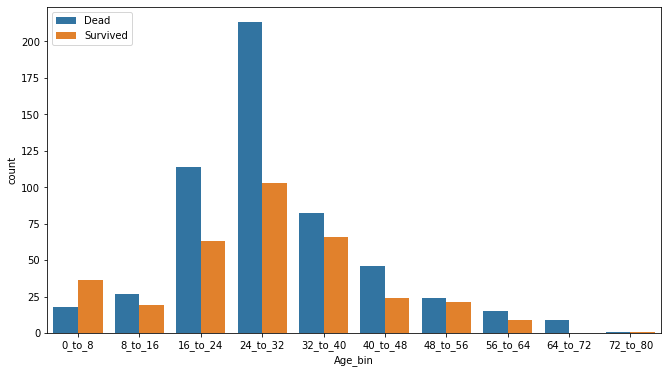

In [63]:
plt.figure(figsize = (11,6))
sns.countplot(data = train_df, x = 'Age_bin', hue = 'Survived')
plt.legend(['Dead', 'Survived'])
plt.show()

In [64]:
cols_to_drop = ['Sex','Name','Ticket']
train_df.drop(columns = cols_to_drop, inplace=True)

In [65]:
from sklearn.preprocessing import StandardScaler

num_features = ['Age', 'Fare']
for col in num_features:
    scalar = StandardScaler()
    train_df[col] = scalar.fit_transform(np.array(train_df[col].values).reshape(-1,1))

In [66]:
train_df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter,is_female,Family_Size,Group_Size,Title,Fare_bin,Age_bin
0,1,0,3,-0.552360,1,0,-0.502445,S,Unknown,0,2,1,Mr,-inf_to_7.9104,16_to_24
1,2,1,1,0.659475,1,0,0.786845,C,C,1,2,1,Mrs,34.6344_to_inf,32_to_40
2,3,1,3,-0.249401,0,0,-0.488854,S,Unknown,1,1,1,Miss,7.9104_to_14.4542,24_to_32
3,4,1,1,0.432256,1,0,0.420730,S,C,1,2,2,Mrs,34.6344_to_inf,32_to_40
4,5,0,3,0.432256,0,0,-0.486337,S,Unknown,0,1,1,Mr,7.9104_to_14.4542,32_to_40
